# Setup

In [1]:
# data wrangling
import pandas as pd

# top2vec
from top2vec import Top2Vec

# data visualisation
import matplotlib.pyplot as plt

In [2]:
# import data
df = pd.read_excel("output/obama_speeches.xlsx", index_col = 0)
df

,speech,date
file_1,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2004-07-27
file_2,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2005-01-06
file_3,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2005-06-04
file_4,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2005-10-25
file_5,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2005-12-15
...,...,...
file_432,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2017-01-10
file_433,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2017-01-12
file_434,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2017-01-17
file_435,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2017-01-18


In [3]:
speeches_list = df['speech'].tolist()

# Top2Vec

In [4]:
# train top2vec model
model = Top2Vec(speeches_list)

2022-05-30 09:37:11,452 - top2vec - INFO - Pre-processing documents for training
2022-05-30 09:37:14,423 - top2vec - INFO - Creating joint document/word embedding
2022-05-30 09:38:22,985 - top2vec - INFO - Creating lower dimension embedding of documents
2022-05-30 09:38:28,988 - top2vec - INFO - Finding dense areas of documents
2022-05-30 09:38:28,998 - top2vec - INFO - Finding topics


In [5]:
# print the number of speeches most similar to each topic
topic_sizes = model.get_topic_sizes()
print(topic_sizes)

(array([119, 114,  96,  59,  48]), array([0, 1, 2, 3, 4]))


In [6]:
# get topic parameters
topic_words, word_scores, topic_nums = model.get_topics()

In [7]:
# assign names to topics
topic_names = ['injustice', 'finance', 'unity', 'enemies', 'defence']

In [8]:
# print topics and associated keywords
for words, scores, topic in zip(topic_words, word_scores, topic_names):
    print(f"topic: {topic}")
    print(f"keywords: {words}\n")

topic: injustice
keywords: ['health' 'afford' 'insurance' 'medicare' 'savings' 'deficit' 'tax'
 'spending' 'affordable' 'economy' 'premiums' 'care' 'money' 'deficits'
 'costs' 'debt' 'coverage' 'pay' 'cost' 'cuts' 'businesses' 'plan'
 'trillion' 'jobs' 'budget' 'republicans' 'recession' 'wealthiest'
 'medicaid' 'reform' 'banks' 'seniors' 'recovery' 'bills' 'waste'
 'college' 'loans' 'credit' 'democrats' 'mortgage' 'dollars' 'consumers'
 'class' 'bill' 'crisis' 'financial' 'preexisting' 'get' 'taxpayers'
 'investments']

topic: finance
keywords: ['dr' 'king' 'life' 'church' 'his' 'hearts' 'love' 'black' 'martin' 'god'
 'man' 'he' 'justice' 'lincoln' 'memorial' 'words' 'grace' 'day' 'parks'
 'quiet' 'her' 'story' 'him' 'loved' 'tells' 'slavery' 'honor' 'knew'
 'family' 'march' 'movement' 'understood' 'white' 'prayer' 'lived' 'men'
 'stories' 'himself' 'pain' 'marched' 'tragedy' 'kennedy' 'wrote' 'friend'
 'cynicism' 'mother' 'moral' 'faith' 'heart' 'hope']

topic: unity
keywords: ['natio

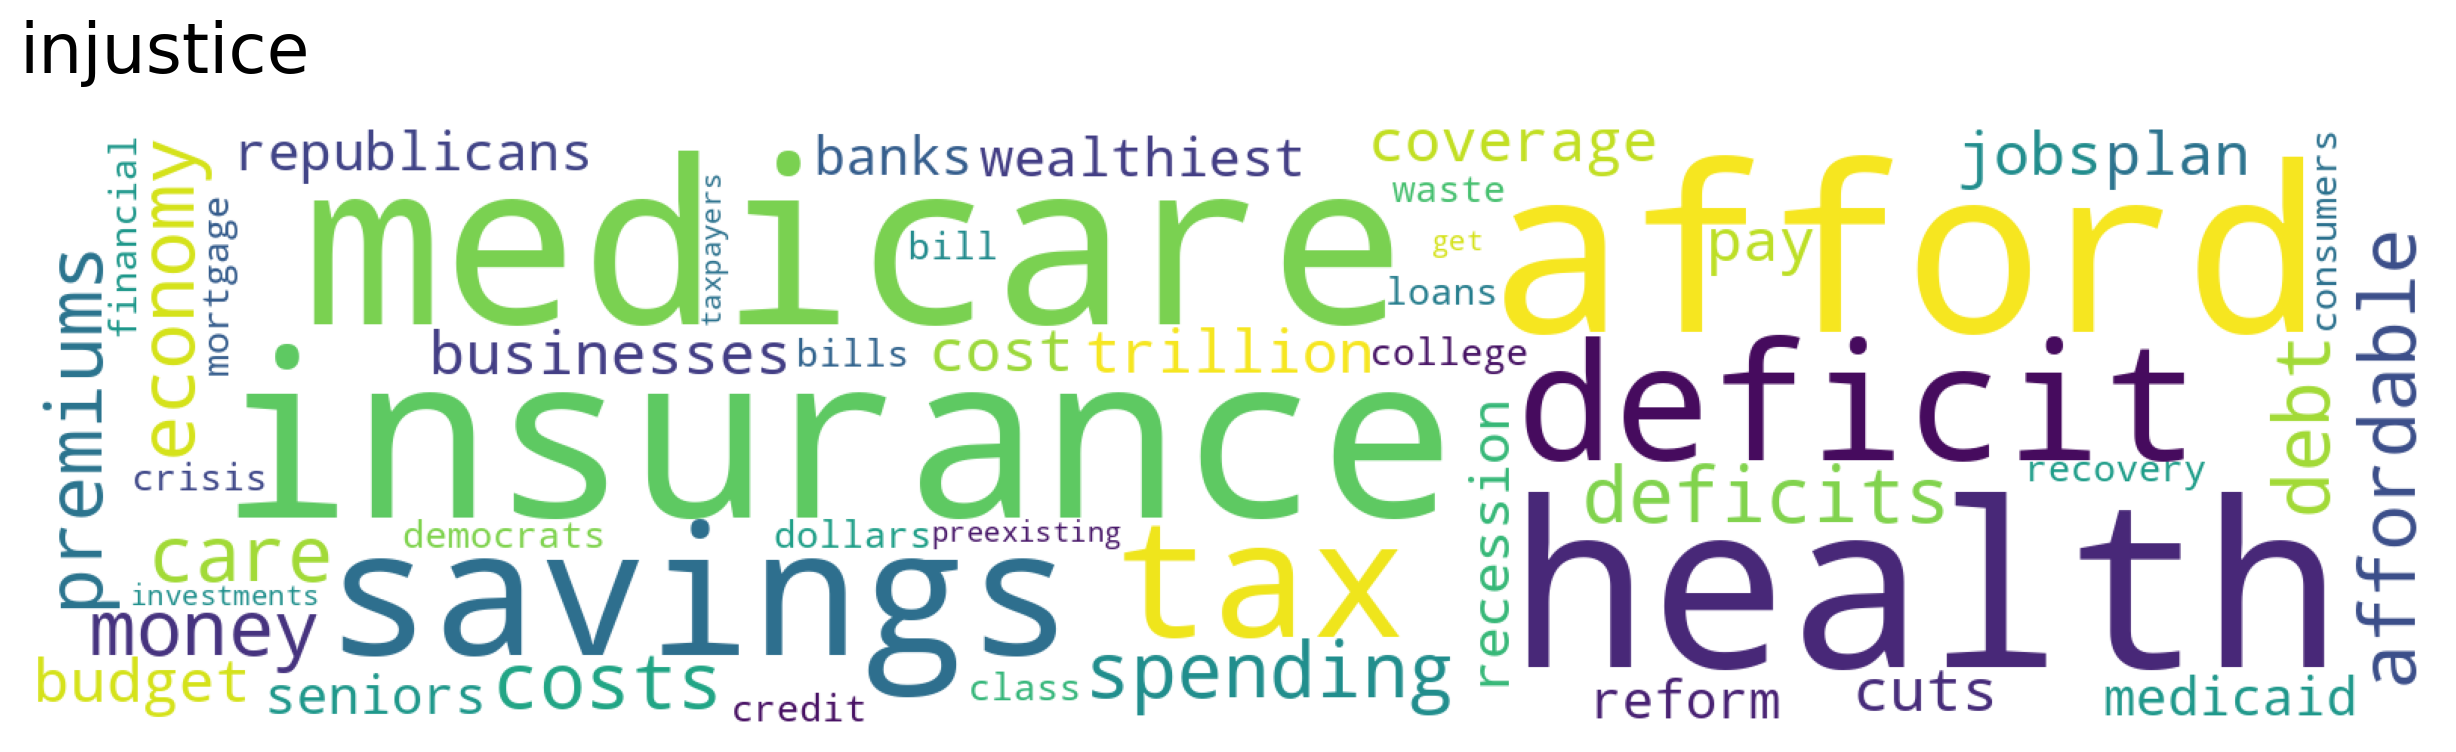

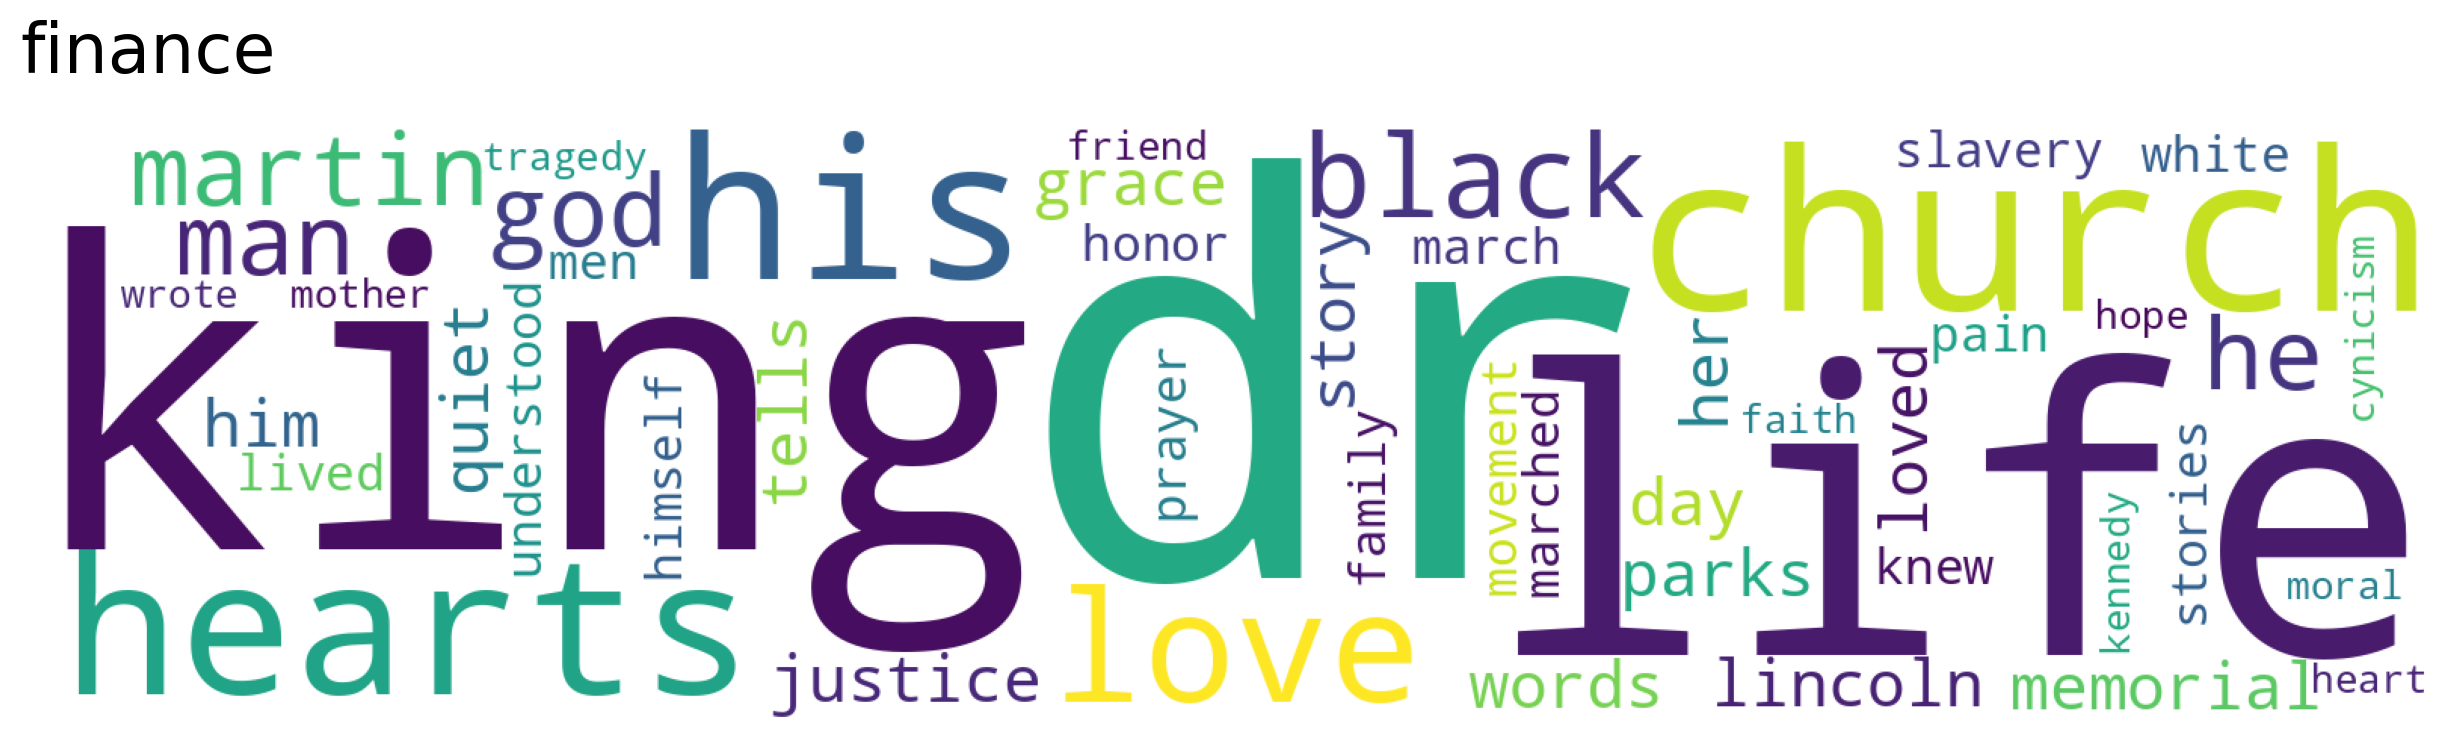

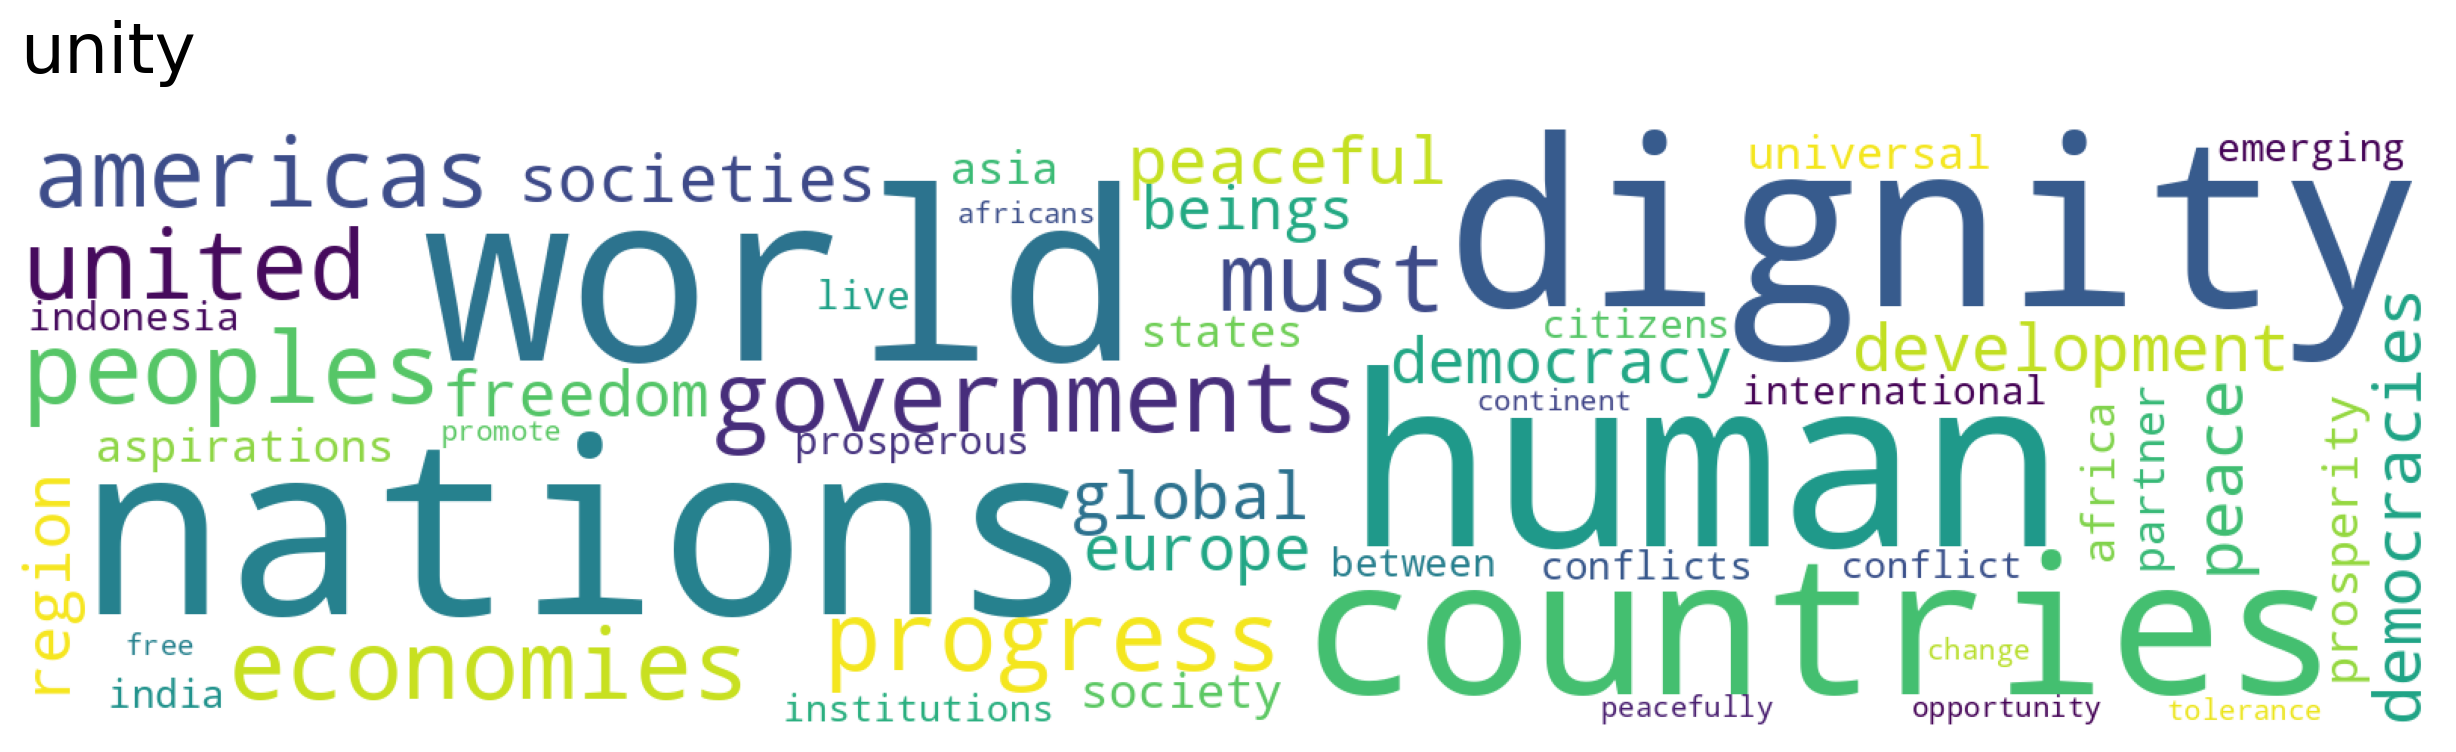

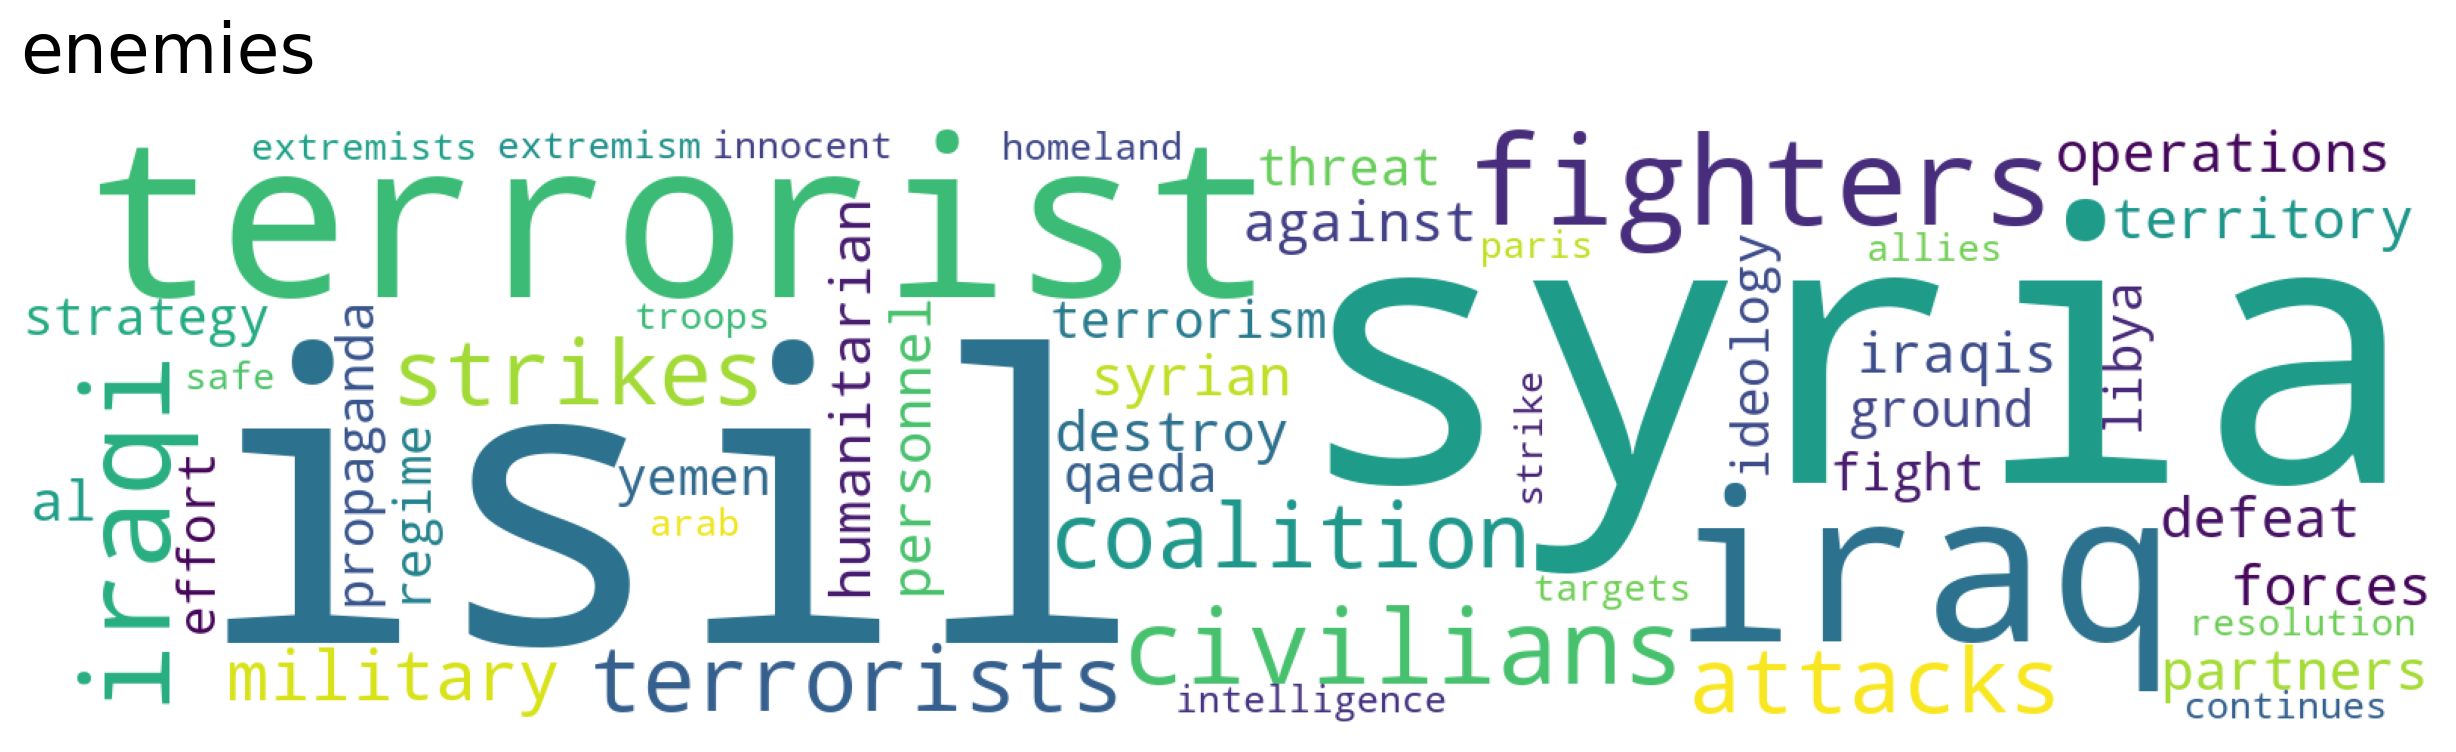

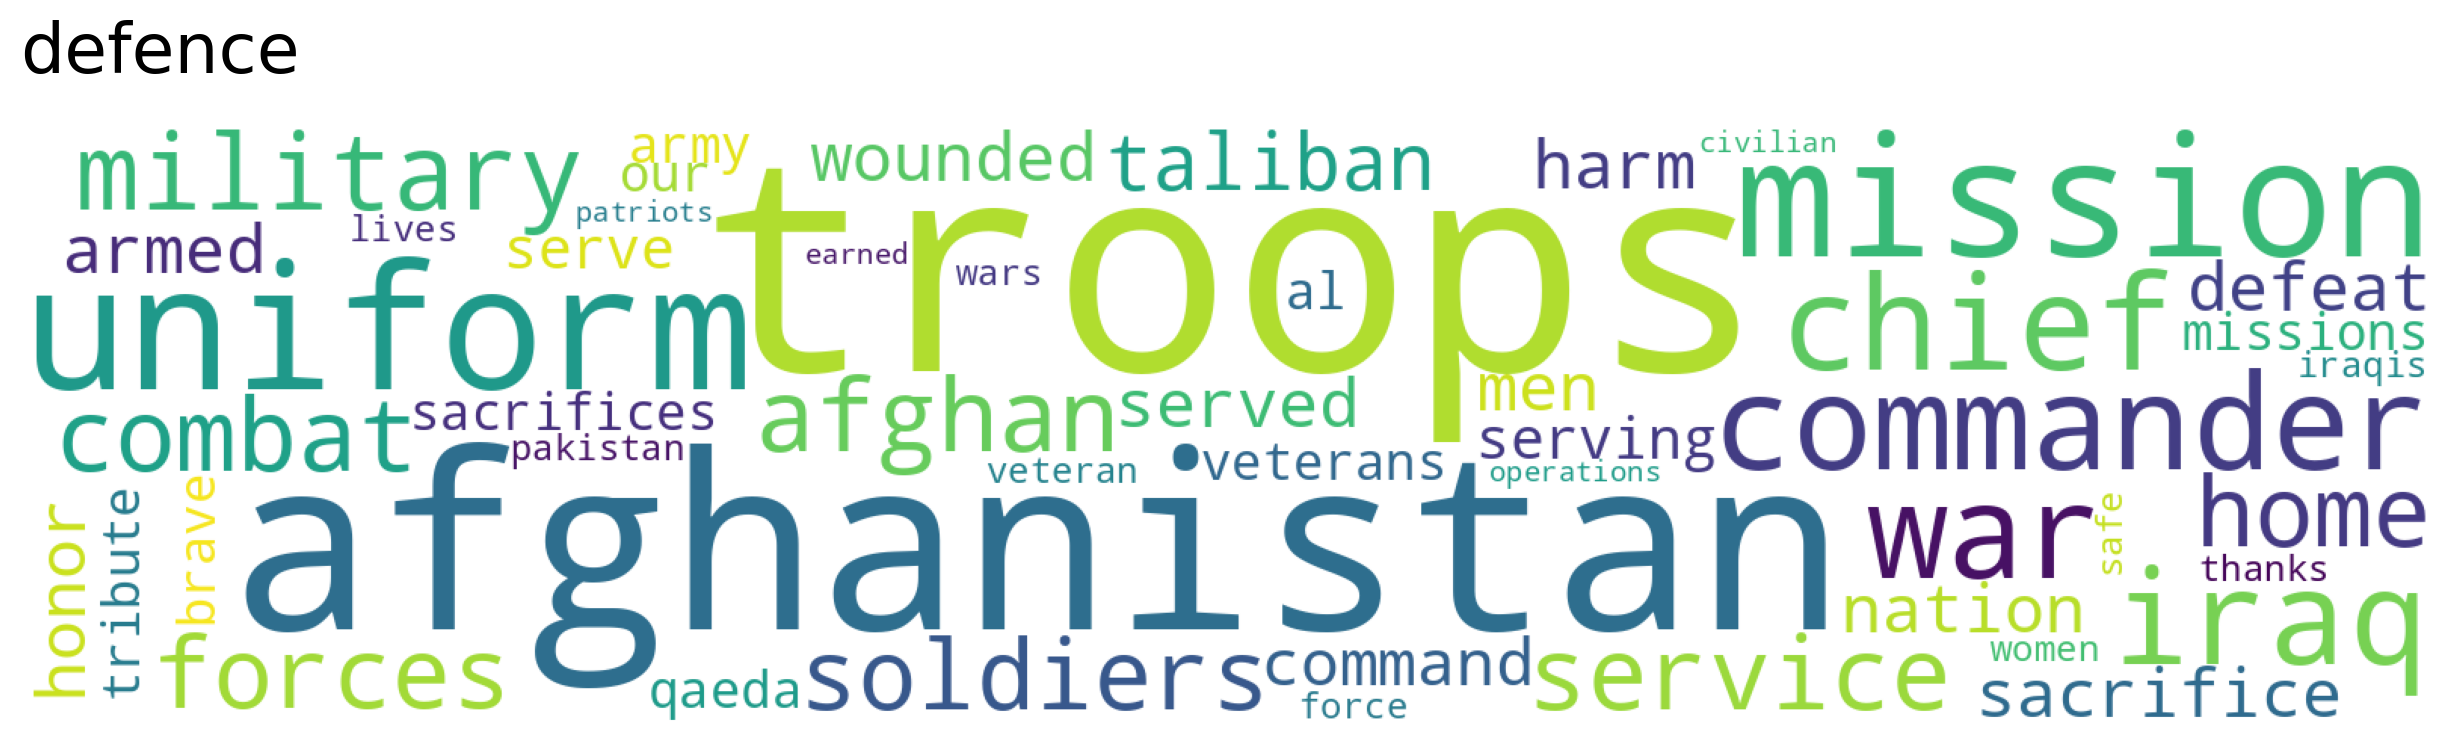

In [9]:
# generate word clouds
i = 0
for topic in topic_nums:
    model.generate_topic_wordcloud(topic, background_color = "white")
    plt.title(topic_names[i], loc = "left", fontsize = 25, pad = 20)
    plt.show()
    print("\n")
    i = i + 1